In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings

In [21]:
data = [15866.8, 10186.2, 27461.6, 19798, 14437.6, 8769.4, 24938.7, 18226.9, 13003.8, 8575.7, 22992.9, 18255.8, 12644.9, 8205.9,
        21728.2, 17542.4, 12555.9, 8312.7, 21376.1, 17173.1, 11852.2, 7373.2, 20522.1, 16854.9, 11109.4, 7140, 19864.3, 15904.9
        , 10389.7, 6869.1]
# data = [27461.6, 19798, 14437.6, 8769.4, 24938.7, 18226.9, 13003.8, 8575.7, 22992.9, 18255.8, 12644.9, 8205.9,
#         21728.2, 17542.4, 12555.9, 8312.7, 21376.1, 17173.1, 11852.2, 7373.2, 20522.1, 16854.9, 11109.4, 7140, 19864.3, 15904.9
#         , 10389.7, 6869.1]
primary_rate = [6.6, 2, 5.7, 4.1, 3.4, 1.8, 5.7, 5, 3.2, 2.1, 6.9, 5.4, 3.7, 2, 4.7, 5.7, 3.2, 2, 6.3, 5.7, 3.3, 1.9, 5.9, 6.2, 3.5, 2, 6.9, 4.9, 2.5, 1.8
]
# primary_rate = [5.7, 4.1, 3.4, 1.8, 5.7, 5, 3.2, 2.1, 6.9, 5.4, 3.7, 2, 4.7, 5.7, 3.2, 2, 6.3, 5.7, 3.3, 1.9, 5.9, 6.2, 3.5, 2, 6.9, 4.9, 2.5, 1.8
# ]

data = np.array(data, dtype = np.float) 

data = data[::-1]

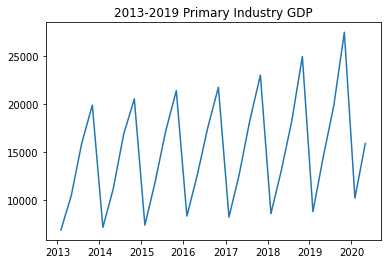

In [22]:
data=pd.Series(data)
data.index = pd.Index(pd.date_range('20130101',periods=30,freq='3M'))

plt.figsize = (12,8)
plt.title('2013-2019 Primary Industry GDP')
plt.plot(data)
plt.show()

<Figure size 432x288 with 0 Axes>

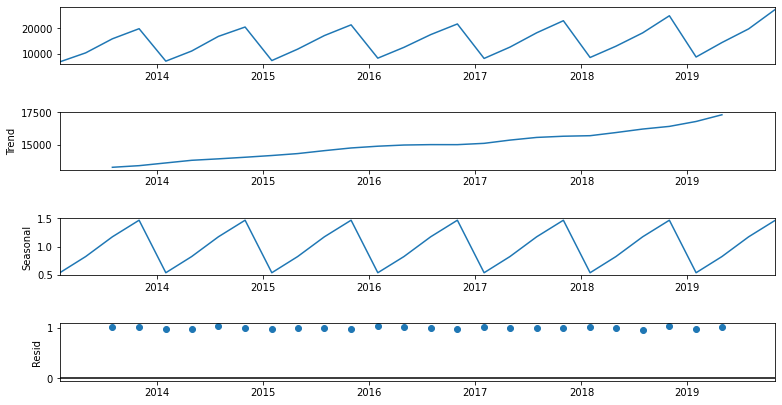

In [6]:
decomposition = seasonal_decompose(data, model='multiplicative', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

<Figure size 432x288 with 0 Axes>

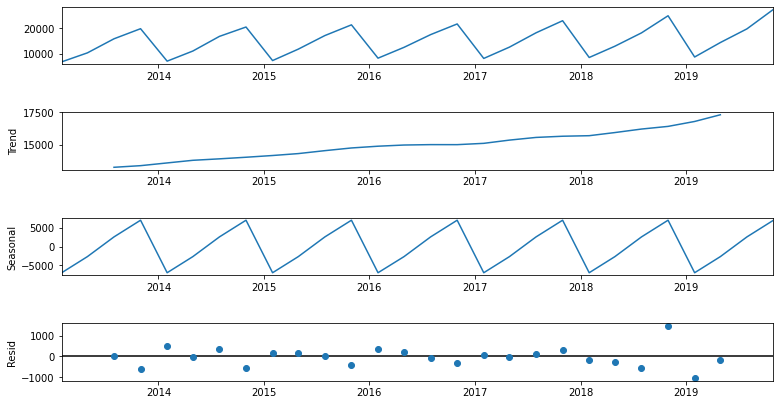

In [7]:
decomposition = seasonal_decompose(data, model='additive', period=4)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 6)

In [8]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 4).mean()
    rolstd = timeseries.rolling(window = 4).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    # plt.title('mean and std')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

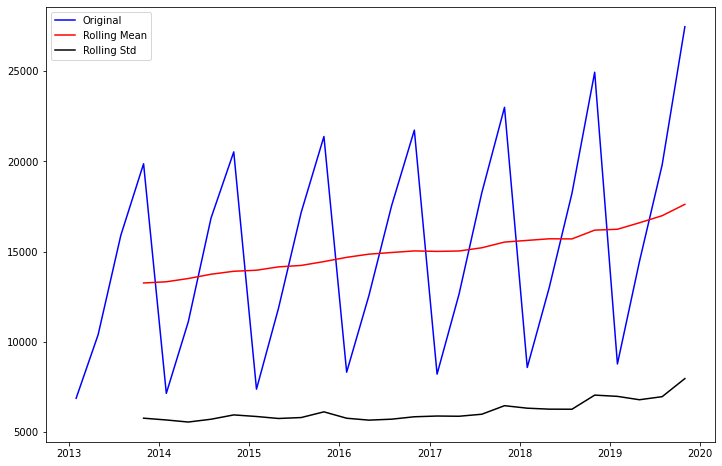

Results of Dickey-Fuller Test:
Test Statistic                  2.017504
p-value                         0.998695
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
dtype: float64
Test Statistic                  2.017504
p-value                         0.998695
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
dtype: float64
Test Statistic                  2.017504
p-value                         0.998695
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [9]:
test_stationarity(data)

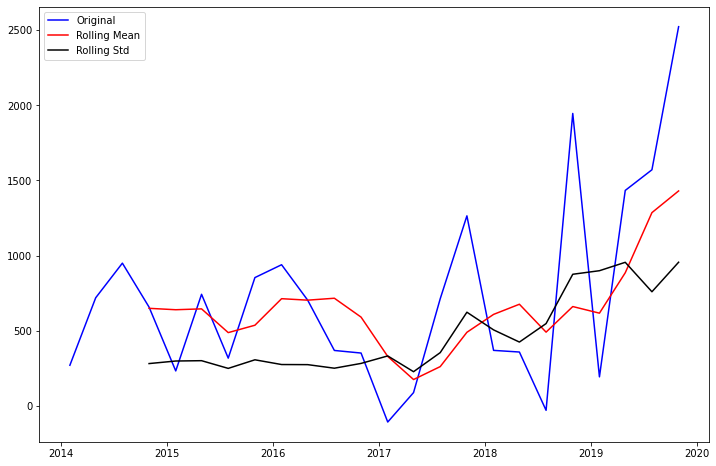

Results of Dickey-Fuller Test:
Test Statistic                 -2.131431
p-value                         0.232065
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
dtype: float64
Test Statistic                 -2.131431
p-value                         0.232065
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
dtype: float64
Test Statistic                 -2.131431
p-value                         0.232065
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [10]:
data_diff4 = data.diff(4)
test_stationarity(data_diff4.dropna(inplace=False))

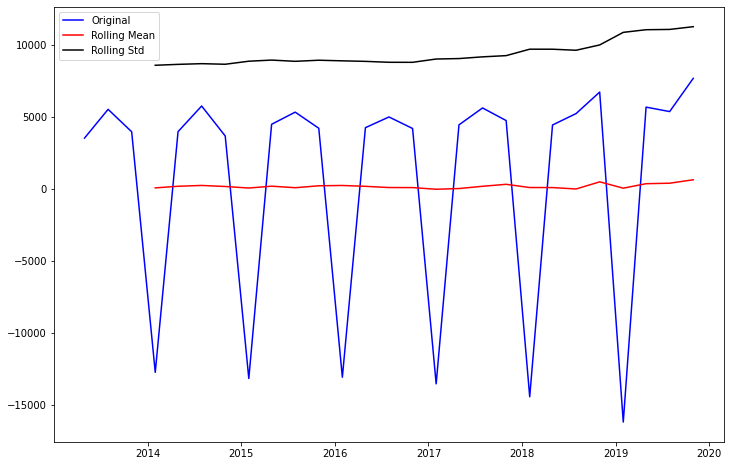

Results of Dickey-Fuller Test:
Test Statistic                 -2.145913
p-value                         0.226458
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
dtype: float64
Test Statistic                 -2.145913
p-value                         0.226458
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
dtype: float64
Test Statistic                 -2.145913
p-value                         0.226458
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [11]:
data_diff1 = data.diff(1)
test_stationarity(data_diff1.dropna(inplace=False))

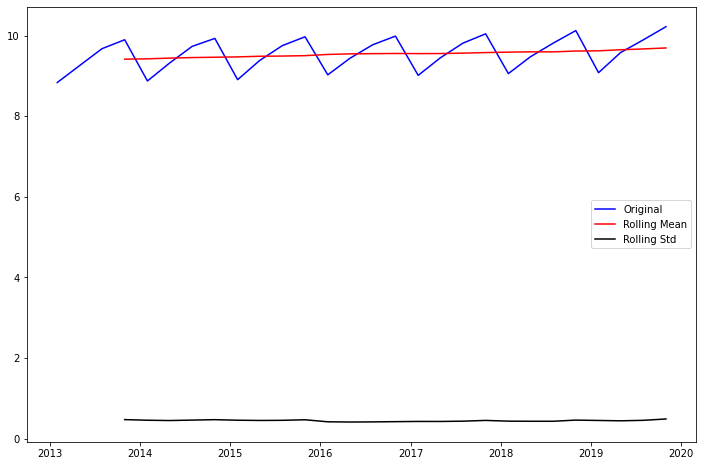

Results of Dickey-Fuller Test:
Test Statistic                  0.560683
p-value                         0.986605
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
dtype: float64
Test Statistic                  0.560683
p-value                         0.986605
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
dtype: float64
Test Statistic                  0.560683
p-value                         0.986605
#Lags Used                      3.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [12]:
data_log = np.log(data)
test_stationarity(data_log)

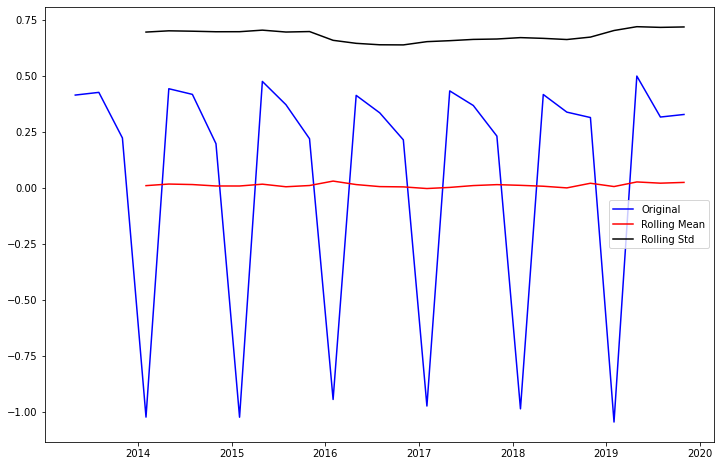

Results of Dickey-Fuller Test:
Test Statistic                 -2.913110
p-value                         0.043845
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
dtype: float64
Test Statistic                 -2.913110
p-value                         0.043845
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
dtype: float64
Test Statistic                 -2.913110
p-value                         0.043845
#Lags Used                      3.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [13]:
data_log_diff1 = data_log.diff(1)
test_stationarity(data_log_diff1.dropna(inplace=False))

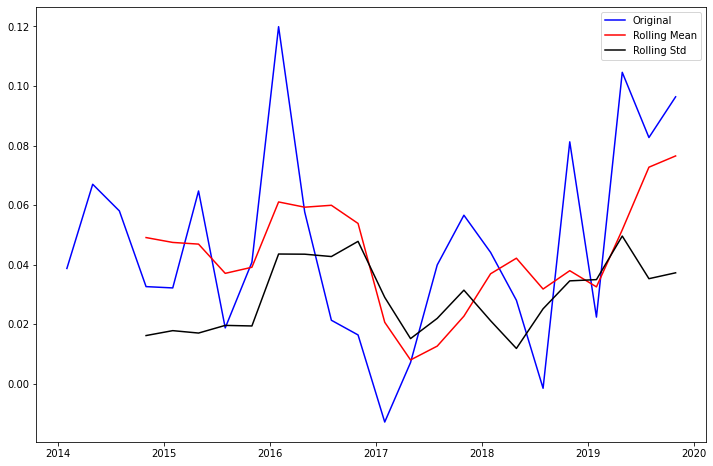

Results of Dickey-Fuller Test:
Test Statistic                 -2.626706
p-value                         0.087602
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
dtype: float64
Test Statistic                 -2.626706
p-value                         0.087602
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
dtype: float64
Test Statistic                 -2.626706
p-value                         0.087602
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [14]:
data_log_diff4 = data_log.diff(4)
test_stationarity(data_log_diff4.dropna(inplace=False))

In [15]:
p = q = range(0, 3)
d = [1, 1, 1]
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], 1, x[2], 4) for x in list(itertools.product(p, d, q))]
 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 4)
SARIMAX: (0, 1, 1) x (0, 1, 2, 4)
SARIMAX: (0, 1, 2) x (0, 1, 0, 4)
SARIMAX: (0, 1, 2) x (0, 1, 1, 4)


In [16]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

results = []
best_aic = float("inf")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(data_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            result = model.fit()

            # print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print('wrong parameters:', param_seasonal)
            continue
            
        aic = result.aic
        if aic < best_aic:
            best_result = result
            best_aic = aic
            best_param_seasonal = param_seasonal
            best_param = param
        results.append([param, param_seasonal, result.aic])

result_table = pd.DataFrame(results)
result_table.columns = ['param', 'param_seasonal', 'aic']
print(result_table.sort_values(by='aic', ascending=True).head())
print(best_result.summary()) 

         param param_seasonal        aic
327  (1, 1, 0)   (0, 1, 0, 4) -78.301494
411  (1, 1, 0)   (0, 1, 0, 4) -78.301494
243  (1, 1, 0)   (0, 1, 0, 4) -78.301494
408  (1, 1, 0)   (0, 1, 0, 4) -78.301494
405  (1, 1, 0)   (0, 1, 0, 4) -78.301494
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   28
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 4)   Log Likelihood                  41.151
Date:                           Wed, 02 Sep 2020   AIC                            -78.301
Time:                                   18:37:25   BIC                            -76.119
Sample:                               01-31-2013   HQIC                           -77.787
                                    - 10-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err  

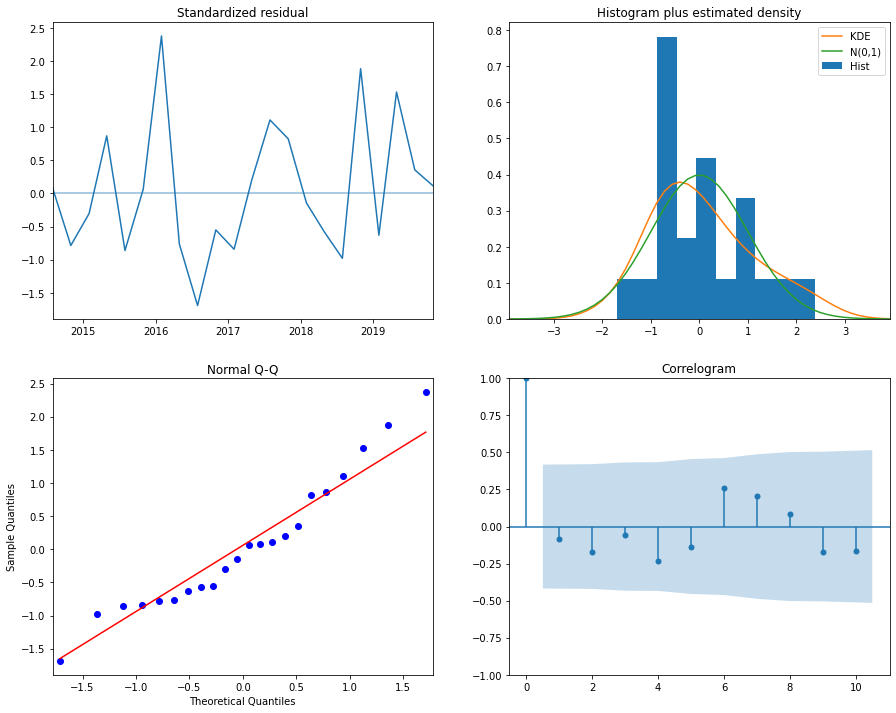

In [17]:
best_result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [18]:
# pred = best_result.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False) #预测值
# pred = best_result.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False) #预测值
pred = best_result.forecast(2)
# pred_ci = pred.conf_int() #置信区间
pred

2020-01-31    9.169538
2020-04-30    9.670609
Freq: 3M, dtype: float64

In [19]:
import math

pred_log_gdp = np.array([9.169538, 9.670609])
pred_gdp_Q1 = np.exp(pred_log_gdp)

print(pred_gdp_Q1)

[ 9600.18837827 15844.99568818]


In [24]:
data

2013-01-31     6869.1
2013-04-30    10389.7
2013-07-31    15904.9
2013-10-31    19864.3
2014-01-31     7140.0
2014-04-30    11109.4
2014-07-31    16854.9
2014-10-31    20522.1
2015-01-31     7373.2
2015-04-30    11852.2
2015-07-31    17173.1
2015-10-31    21376.1
2016-01-31     8312.7
2016-04-30    12555.9
2016-07-31    17542.4
2016-10-31    21728.2
2017-01-31     8205.9
2017-04-30    12644.9
2017-07-31    18255.8
2017-10-31    22992.9
2018-01-31     8575.7
2018-04-30    13003.8
2018-07-31    18226.9
2018-10-31    24938.7
2019-01-31     8769.4
2019-04-30    14437.6
2019-07-31    19798.0
2019-10-31    27461.6
2020-01-31    10186.2
2020-04-30    15866.8
Freq: 3M, dtype: float64

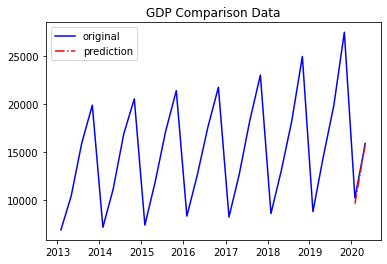

In [23]:
pred_gdp_Q1 = pd.Series(pred_gdp_Q1)
pred_gdp_Q1.index = pd.Index(pd.date_range('20200101',periods=2,freq='3M'))
plt.figsize = (12,8)
plt.plot(data,'b', label='original')
plt.plot(pred_gdp_Q1,'r-.', label='prediction')
plt.title('GDP Comparison Data')
plt.legend()
plt.savefig('fianl')
plt.show()